## ENTREGABLE 1. BMW PRICING

### IMPORTAMOS LIBRERIAS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [4]:
#mostrar df o columnas enteras:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### LEEMOS EL FICHERO

In [5]:
df = pd.read_csv("bmw_pricing_v3.csv")

### ANALIZAMOS EL DATAFRAME

In [6]:
df[df.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [8]:
df.isna().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [9]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


#### Inicialmente borramos la columna marca porque al tener un solo valor no aporta información al modelo.

In [10]:
del df["marca"]

In [11]:
df.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


### Pasamos las columnas con fechas a tipo datetime

In [ ]:
columnas_fechas = ['fecha_registro', 'fecha_venta']

for col in columnas_fechas:
    df[col] = pd.to_datetime(df[col])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4840 non-null   object        
 1   km                           4841 non-null   float64       
 2   potencia                     4842 non-null   float64       
 3   fecha_registro               2420 non-null   datetime64[ns]
 4   tipo_gasolina                4838 non-null   object        
 5   color                        4398 non-null   object        
 6   tipo_coche                   3383 non-null   object        
 7   volante_regulable            4839 non-null   object        
 8   aire_acondicionado           4357 non-null   object        
 9   camara_trasera               4841 non-null   object        
 10  asientos_traseros_plegables  1452 non-null   object        
 11  elevalunas_electrico         4841 non-null 

#### COLUMNA MODELO

In [14]:
df.modelo.value_counts(dropna=False)

modelo
320                  752
520                  633
318                  568
X3                   438
116                  358
X1                   274
316                  235
X5                   231
525                  184
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
535                   46
X4                    46
X6                    44
420                   44
120                   36
730                   33
420 Gran Coupé        33
330                   33
520 Gran Turismo      23
640 Gran Coupé        19
325                   19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
218                   12
M550                  12
218 Gran Tourer        9
640                    8
418 Gran Coupé         8
X6 M                   8
335                    7
M3                     7
Z4                     6
i3                

In [15]:
df.modelo.isnull().sum()

3

In [16]:
# columna "modelo", eliminamos los nulos.
df.dropna(subset=["modelo"],inplace=True)

In [17]:

modelos_a_agrupar = df['modelo'].value_counts()[df['modelo'].value_counts() < 50].index.tolist()
df.loc[df['modelo'].isin(modelos_a_agrupar), 'modelo'] = 'otros_modelos'

In [18]:
df.modelo.value_counts(dropna=False)


modelo
320                 752
520                 633
otros_modelos       631
318                 568
X3                  438
116                 358
X1                  274
316                 235
X5                  231
525                 184
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
Name: count, dtype: int64

#### COLUMNA KM

In [19]:
df["km"].describe()

count    4.838000e+03
mean     1.409681e+05
std      6.022519e+04
min     -6.400000e+01
25%      1.028630e+05
50%      1.410845e+05
75%      1.752305e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: xlabel='km'>

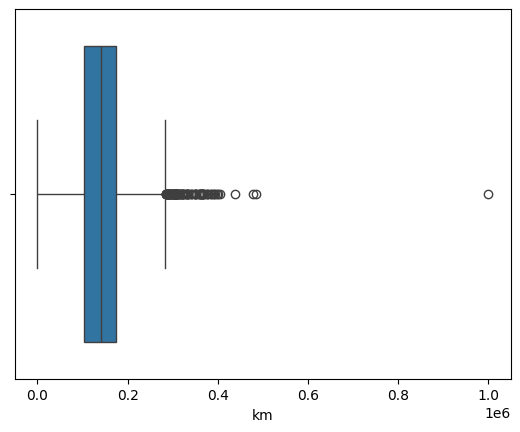

In [20]:
sns.boxplot(x = df["km"])

In [21]:
df["km"].median()

141084.5

In [22]:
df[df["km"]<0]


,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,otros_modelos,-64.0,230.0,NaT,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01


In [23]:
# columna "km", pasamos a la media el valor negativo
df.loc[2938, "km"] = df["km"].mean()

In [24]:
df["km"].describe()

count    4.838000e+03
mean     1.409972e+05
std      6.019103e+04
min      4.760000e+02
25%      1.028988e+05
50%      1.410845e+05
75%      1.752305e+05
max      1.000376e+06
Name: km, dtype: float64

In [25]:
df.km.isna().sum()

2

In [26]:
# pasamos valores nulos a la media
df["km"].fillna(df["km"].mean(),inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1049976291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["km"].fillna(df["km"].mean(),inplace=True)


In [27]:
df["km"].isna().sum()

0

#### COLUMNA POTENCIA

In [28]:
df["potencia"].describe()

count    4839.000000
mean      128.995660
std        39.002923
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [29]:
df[df["potencia"] == 0]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3765,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,NaN,11700.0,2018-03-01


In [30]:
df[(df['modelo'] == 'X1')].potencia.value_counts()

potencia
105.0    91
100.0    54
85.0     36
135.0    33
120.0    31
130.0    13
160.0     9
150.0     3
110.0     2
0.0       1
137.0     1
Name: count, dtype: int64

<Axes: >

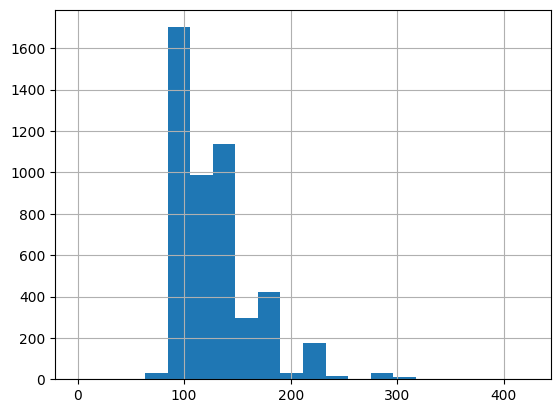

In [31]:
df["potencia"].hist(bins=20)

In [32]:
# cambiamos el valor de 0 a la moda de ese modelo de coche
df.loc[3765, "potencia"] = df[(df['modelo'] == 'X1')].potencia.mode().iloc[0]

In [33]:
df.loc[3765] 

modelo                                          X1
km                                         81770.0
potencia                                     105.0
fecha_registro                 2014-10-01 00:00:00
tipo_gasolina                               diesel
color                                        white
tipo_coche                                     suv
volante_regulable                            False
aire_acondicionado                           False
camara_trasera                               False
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                          False
alerta_lim_velocidad                           NaN
precio                                     11700.0
fecha_venta                    2018-03-01 00:00:00
Name: 3765, dtype: object

In [34]:
# cambiamos el valor nulo a la media
df["potencia"].fillna(df["potencia"].mean(),inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\3892279531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["potencia"].fillna(df["potencia"].mean(),inplace=True)


In [35]:
df["potencia"].isna().sum()

0

#### PRIMERA EXPLORACIÓN FECHA REGISTRO

In [36]:
#Creamos columna con la diferencia entre la fecha de venta y la fecha de registro

df['dif_registro_venta'] = (df['fecha_venta'] - df['fecha_registro']) / np.timedelta64(1, 'D')

In [37]:
df["dif_registro_venta"].describe()

count     2419.000000
mean      1967.211244
std        923.042905
min      -2009.000000
25%       1489.000000
50%       1767.000000
75%       2130.000000
max      10258.000000
Name: dif_registro_venta, dtype: float64

In [38]:
df[df["dif_registro_venta"]<0]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dif_registro_venta
100,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,False,NaN,True,False,True,NaN,8200.0,2010-04-01,-609.0
256,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,NaN,False,NaN,False,False,True,False,8800.0,2008-06-01,-2009.0


In [39]:
# eliminamos las dos filas con valores negativos 
df.drop(df[df["dif_registro_venta"]<0].index, inplace=True)

In [40]:
df["dif_registro_venta"].describe()


count     2417.000000
mean      1969.922218
std        918.376356
min        215.000000
25%       1489.000000
50%       1767.000000
75%       2130.000000
max      10258.000000
Name: dif_registro_venta, dtype: float64

<Axes: >

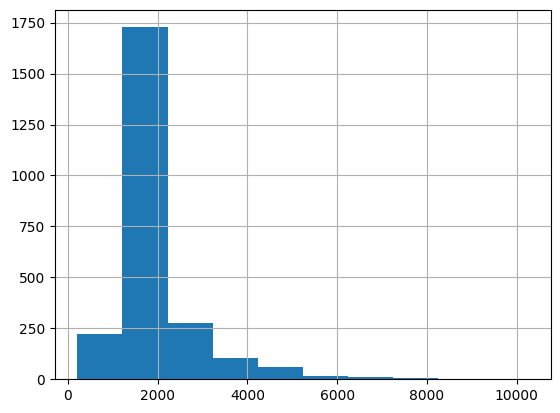

In [41]:
df["dif_registro_venta"].hist(bins=10)

In [42]:
df["fecha_registro"].isna().sum()

2421

#### COLUMNA TIPO GASOLINA

In [43]:
# columna "tipo_gasolina"
df["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4626
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [44]:
# borramos categorias "electro" e "hybrid_petrol" porque tienen muy pocos registros

df.drop(df[df["tipo_gasolina"].isin(["electro","hybrid_petrol"])].index, inplace=True)

In [45]:
df["tipo_gasolina"].unique()

array(['diesel', 'petrol', nan, 'Diesel'], dtype=object)

In [46]:
# agrupamos las variables "Diesel" y "diesel"
df["tipo_gasolina"] = np.where(df["tipo_gasolina"] == "Diesel", "diesel", df["tipo_gasolina"])

In [47]:
df["tipo_gasolina"].unique()


array(['diesel', 'petrol', nan], dtype=object)

In [48]:
df["tipo_gasolina"].isna().sum()

5

In [49]:
# cambiamos nulos a la moda
df["tipo_gasolina"].fillna("diesel", inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\2256432072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tipo_gasolina"].fillna("diesel", inplace=True)


In [50]:
df["tipo_gasolina"].isna().sum()


0

#### COLUMNA COLOR

In [51]:
df["color"].value_counts(dropna=False)

color
black     1492
grey      1066
blue       646
white      482
NaN        445
brown      301
silver     291
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [52]:
# creamos categoría "desconocido" para los nulos
df["color"].fillna("desconocido", inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\2144353668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["color"].fillna("desconocido", inplace=True)


In [53]:
df["color"].value_counts(dropna=False)


color
black          1492
grey           1066
blue            646
white           482
desconocido     445
brown           301
silver          291
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64

In [54]:
# agrupamos colores con menos de 50 observaciones en una categoria llamada "otros"
colores_a_agrupar= df['color'].value_counts()[df['color'].value_counts() < 50].index.tolist()
df.loc[df['color'].isin(colores_a_agrupar), 'color'] = 'otros'


In [55]:
df["color"].value_counts(dropna=False)


color
black          1492
grey           1066
blue            646
white           482
desconocido     445
brown           301
silver          291
otros           104
Name: count, dtype: int64

#### COLUMNA TIPO COCHE

In [56]:
df["tipo_coche"].value_counts(dropna=False)

tipo_coche
NaN            1453
estate         1106
sedan           820
suv             752
hatchback       485
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64

In [57]:
df['tipo_coche'].fillna('desconocido', inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1513915780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo_coche'].fillna('desconocido', inplace=True)


In [58]:
df["tipo_coche"].value_counts(dropna=False)

tipo_coche
desconocido    1453
estate         1106
sedan           820
suv             752
hatchback       485
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4827 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4827 non-null   object        
 1   km                           4827 non-null   float64       
 2   potencia                     4827 non-null   float64       
 3   fecha_registro               2413 non-null   datetime64[ns]
 4   tipo_gasolina                4827 non-null   object        
 5   color                        4827 non-null   object        
 6   tipo_coche                   4827 non-null   object        
 7   volante_regulable            4823 non-null   object        
 8   aire_acondicionado           4343 non-null   object        
 9   camara_trasera               4825 non-null   object        
 10  asientos_traseros_plegables  1446 non-null   object        
 11  elevalunas_electrico         4825 non-null   obj

#### COLUMNA VOLANTE REGULABLE

In [60]:
df.volante_regulable.value_counts(dropna=False)

volante_regulable
True     2653
False    2170
NaN         4
Name: count, dtype: int64

In [61]:
df.dropna(subset=['volante_regulable'], inplace=True)

In [62]:
df.volante_regulable.value_counts(dropna=False)

volante_regulable
True     2653
False    2170
Name: count, dtype: int64

#### COLUMNA AIRE ACONDICIONADO

In [63]:
df.aire_acondicionado.value_counts(dropna=False, normalize=True)

aire_acondicionado
True     0.715737
False    0.184325
NaN      0.099938
Name: proportion, dtype: float64

In [64]:
df['aire_acondicionado'].fillna(df['aire_acondicionado'].mode().iloc[0], inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1271385830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aire_acondicionado'].fillna(df['aire_acondicionado'].mode().iloc[0], inplace=True)
C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1271385830.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [65]:
df.aire_acondicionado.value_counts(dropna=False)

aire_acondicionado
True     3934
False     889
Name: count, dtype: int64

#### COLUMNA CAMARA TRASERA

In [66]:
df.camara_trasera.value_counts(dropna=False)

camara_trasera
False    3845
True      976
NaN         2
Name: count, dtype: int64

In [67]:
df['camara_trasera'].fillna(df['camara_trasera'].mode().iloc[0], inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1363261421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['camara_trasera'].fillna(df['camara_trasera'].mode().iloc[0], inplace=True)
C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1363261421.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cam

In [68]:
df.camara_trasera.value_counts(dropna=False)

camara_trasera
False    3847
True      976
Name: count, dtype: int64

#### COLUMNA ASIENTOS TRASEROS PLEGABLES

In [69]:
df.asientos_traseros_plegables.value_counts(dropna=False)

asientos_traseros_plegables
NaN      3379
False    1143
True      301
Name: count, dtype: int64

In [70]:
del df['asientos_traseros_plegables']

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4823 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4823 non-null   object        
 1   km                    4823 non-null   float64       
 2   potencia              4823 non-null   float64       
 3   fecha_registro        2410 non-null   datetime64[ns]
 4   tipo_gasolina         4823 non-null   object        
 5   color                 4823 non-null   object        
 6   tipo_coche            4823 non-null   object        
 7   volante_regulable     4823 non-null   object        
 8   aire_acondicionado    4823 non-null   bool          
 9   camara_trasera        4823 non-null   bool          
 10  elevalunas_electrico  4821 non-null   object        
 11  bluetooth             4099 non-null   object        
 12  gps                   4823 non-null   bool          
 13  alerta_lim_velocidad  4

#### COLUMNA ELEVALUNAS ELECTRICO

In [72]:
df.elevalunas_electrico.value_counts(dropna=False)

elevalunas_electrico
False    2599
True     2222
NaN         2
Name: count, dtype: int64

In [73]:
df.dropna(subset=['elevalunas_electrico'], inplace=True)

In [74]:
df.elevalunas_electrico.value_counts(dropna=False)

elevalunas_electrico
False    2599
True     2222
Name: count, dtype: int64

#### COLUMNA BLUETOOTH

In [75]:
df.bluetooth.value_counts(dropna=False)

bluetooth
False    3104
True      993
NaN       724
Name: count, dtype: int64

In [76]:
df['bluetooth'].fillna(df['bluetooth'].mode().iloc[0], inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1955341378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bluetooth'].fillna(df['bluetooth'].mode().iloc[0], inplace=True)
C:\Users\natol\AppData\Local\Temp\ipykernel_13048\1955341378.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['bluetooth'].f

In [77]:
df.bluetooth.value_counts(dropna=False)

bluetooth
False    3828
True      993
Name: count, dtype: int64

#### COLUMNA ALERTA VELOCIDAD

In [78]:
df.alerta_lim_velocidad.value_counts(dropna=False)

alerta_lim_velocidad
True     2229
False    1869
NaN       723
Name: count, dtype: int64

In [79]:
df['alerta_lim_velocidad'].fillna('desconocido', inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\190637604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alerta_lim_velocidad'].fillna('desconocido', inplace=True)


In [80]:
df.alerta_lim_velocidad.value_counts(dropna=False)

alerta_lim_velocidad
True           2229
False          1869
desconocido     723
Name: count, dtype: int64

#### COLUMNA PRECIO

In [81]:
df.precio.isnull().sum()

6

In [82]:
df.dropna(subset=['precio'], inplace=True)

In [83]:
df.precio.isnull().sum()

0

#### COLUMNA FECHA VENTA Y FECHA REGISTRO

In [84]:
df.fecha_venta.value_counts(dropna=False)

fecha_venta
2018-05-01    808
2018-03-01    730
2018-04-01    687
2018-06-01    601
2018-07-01    536
2018-08-01    525
2018-02-01    497
2018-09-01    222
2018-01-01    206
2007-08-01      1
2009-04-01      1
NaT             1
Name: count, dtype: int64

In [85]:
df.dropna(subset=['fecha_venta'], inplace=True)

<Axes: >

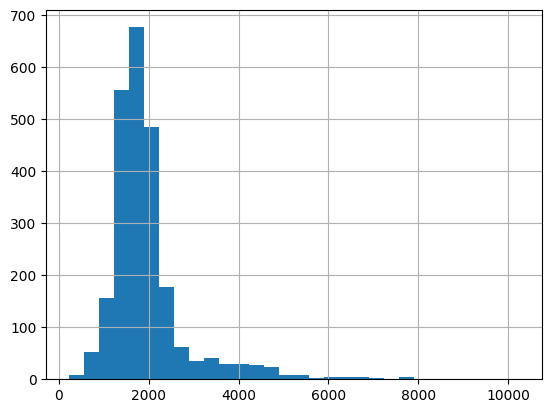

In [86]:
df.dif_registro_venta.hist(bins=30)

In [87]:
df.dif_registro_venta.median()

1767.0

In [88]:
df.dif_registro_venta.mean()

1970.1694352159468

In [89]:
df.dif_registro_venta.mode()

0    1461.0
Name: dif_registro_venta, dtype: float64

In [90]:
df_borrado = df.copy()

In [91]:
df_borrado.dropna(subset=['dif_registro_venta'], inplace=True)

In [92]:
df_borrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2408 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                2408 non-null   object        
 1   km                    2408 non-null   float64       
 2   potencia              2408 non-null   float64       
 3   fecha_registro        2408 non-null   datetime64[ns]
 4   tipo_gasolina         2408 non-null   object        
 5   color                 2408 non-null   object        
 6   tipo_coche            2408 non-null   object        
 7   volante_regulable     2408 non-null   object        
 8   aire_acondicionado    2408 non-null   bool          
 9   camara_trasera        2408 non-null   bool          
 10  elevalunas_electrico  2408 non-null   object        
 11  bluetooth             2408 non-null   bool          
 12  gps                   2408 non-null   bool          
 13  alerta_lim_velocidad  2

In [93]:
del df_borrado['fecha_registro']

In [94]:
del df_borrado['fecha_venta']

In [95]:
df_imputado = df.copy()

In [96]:
df_imputado['dif_registro_venta'].fillna(df_imputado['dif_registro_venta'].median(), inplace=True)

C:\Users\natol\AppData\Local\Temp\ipykernel_13048\4169038306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado['dif_registro_venta'].fillna(df_imputado['dif_registro_venta'].median(), inplace=True)


In [97]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4814 non-null   object        
 1   km                    4814 non-null   float64       
 2   potencia              4814 non-null   float64       
 3   fecha_registro        2408 non-null   datetime64[ns]
 4   tipo_gasolina         4814 non-null   object        
 5   color                 4814 non-null   object        
 6   tipo_coche            4814 non-null   object        
 7   volante_regulable     4814 non-null   object        
 8   aire_acondicionado    4814 non-null   bool          
 9   camara_trasera        4814 non-null   bool          
 10  elevalunas_electrico  4814 non-null   object        
 11  bluetooth             4814 non-null   bool          
 12  gps                   4814 non-null   bool          
 13  alerta_lim_velocidad  4

In [98]:
for col in columnas_fechas:
    del df_imputado[col]

In [99]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4814 non-null   object 
 1   km                    4814 non-null   float64
 2   potencia              4814 non-null   float64
 3   tipo_gasolina         4814 non-null   object 
 4   color                 4814 non-null   object 
 5   tipo_coche            4814 non-null   object 
 6   volante_regulable     4814 non-null   object 
 7   aire_acondicionado    4814 non-null   bool   
 8   camara_trasera        4814 non-null   bool   
 9   elevalunas_electrico  4814 non-null   object 
 10  bluetooth             4814 non-null   bool   
 11  gps                   4814 non-null   bool   
 12  alerta_lim_velocidad  4814 non-null   object 
 13  precio                4814 non-null   float64
 14  dif_registro_venta    4814 non-null   float64
dtypes: bool(4), float64(4), ob

#### Columnas:
    - Modelo: Al haber 3 nulos sin una moda clara decidimos borrar los registros. 
    - km: Encontramos 2 nulos y los sustituimos por la media.
    - Potencia: Sustituimos 1 valor nulo por la media.
    - Tipo gasolina: Se encuentran 5 nulos y se sustituyen por la moda (diesel).
    - Color: Como un 10% de registros son nulos y no hay una moda clara creamos una nueva categoría (desconocido). 
    - Tipo de coche: Como el 30% de los registros son nulos y es la categoría con más registros, creamos una categoría llamada desconocido.
    - Volante regulable: Hay 4 nulos sin una moda clara, asi que los borramos.
    - Aire acondicionado: Hay 482 nulos que se pasan a la moda (True).
    - Camara trasera: Hay 2 nulos que se pasan a la moda (False).
    - Asientos traseros plegables: Se borra esta categoría al tener 3379 nulos (70%).
    - Elevalunas electricos: Hay 2 nulos sin una moda clara, así que borramos.
    - Bluetooth: Hay 724 nulos que se pasan a la moda (False).
    - Alerta limite velocidad: 723 nulos sin una moda clara , creamos una categoría llamada desconocido.
    - Precio: Tiene 6 nulos y al ser el target los borramos.
    - Antigüedad: Creamos esta columna como la diferencia entre las fechas de ventas y registros. Sustituimos los nulos por la mediana.
    

In [100]:
df_imputado.precio.describe()

count      4814.000000
mean      15800.000000
std        9130.300617
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [101]:
#Aunque los precios sean bajos, los mantenemos no son outliers y nos faltan datos para decidir (como el estado del coche) cual seria un precio minimo valido

df_imputado[df_imputado['precio']<500]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_registro_venta
565,320,179358.0,120.0,diesel,black,desconocido,False,True,False,False,False,True,True,100.0,1734.0
630,318,147558.0,105.0,diesel,white,estate,False,True,False,False,False,False,True,100.0,1216.0
879,318,134156.0,105.0,diesel,grey,estate,False,True,False,False,False,False,True,100.0,1400.0
1255,320,170381.0,135.0,diesel,silver,desconocido,True,True,False,False,False,True,False,100.0,1767.0
1513,520,358332.0,100.0,diesel,blue,desconocido,False,False,False,True,False,True,False,400.0,1767.0
1558,520,358333.0,100.0,diesel,blue,estate,False,False,False,True,False,True,desconocido,400.0,1767.0
1832,116,174524.0,85.0,diesel,blue,hatchback,False,True,False,False,False,True,desconocido,100.0,1339.0
2473,525,230578.0,85.0,diesel,desconocido,sedan,False,True,False,False,False,True,desconocido,200.0,7701.0
2574,525,229880.0,85.0,diesel,black,sedan,False,True,False,False,False,True,False,200.0,7701.0
2611,525,230264.0,85.0,diesel,black,sedan,False,False,False,False,False,True,False,200.0,7701.0


In [102]:
df_imputado.rename(columns={'dif_registro_venta': 'antiguedad'}, inplace=True)

In [103]:
df_borrado.rename(columns={'dif_registro_venta': 'antiguedad'}, inplace=True)

<Axes: xlabel='precio'>

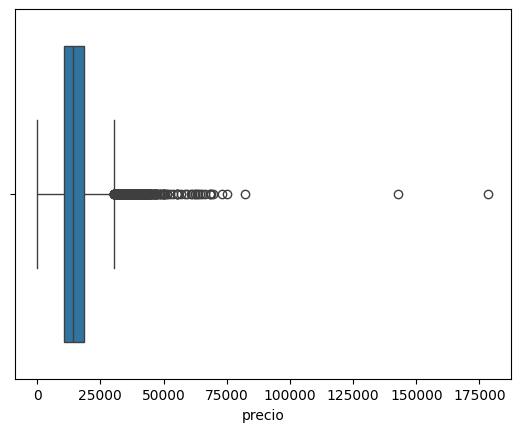

In [104]:
sns.boxplot(x = df["precio"])

In [105]:
df_imputado[df_imputado['precio']>100000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
4684,otros_modelos,103222.0,140.0,diesel,grey,suv,True,True,False,True,False,True,True,142800.0,1461.0
4753,X3,72515.0,135.0,diesel,blue,suv,False,False,True,False,False,False,True,178500.0,1979.0


In [106]:
#Eliminamos los valores superiores a 100000

df_imputado.drop((df_imputado[df_imputado['precio']>100000]).index, inplace=True)

<Axes: xlabel='precio'>

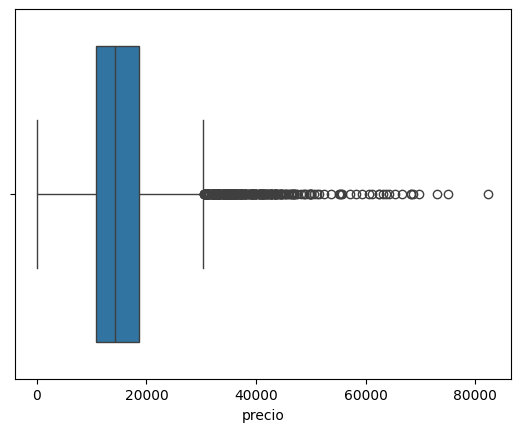

In [107]:
sns.boxplot(x = df_imputado["precio"])

<Axes: >

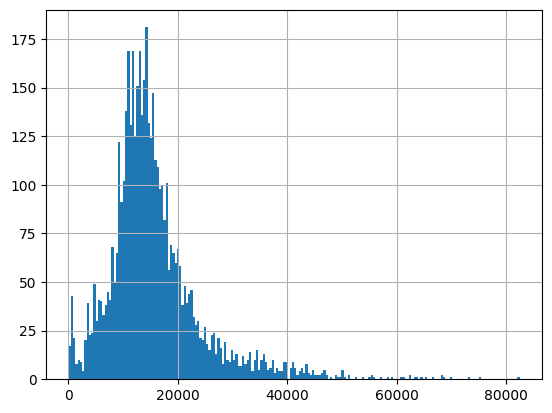

In [108]:
df_imputado.precio.hist(bins=200)

#### Columnas:
    - Modelo: Agrupamos las categorías con menos de 50 registros (otros modelos).
    - km: Encontramos un valor negativo y lo sustituimos por la media. Hay un outlier muy alto (mayor a 1.000.000) y lo borramos.
    - Potencia: Encontramos un valor igual a 0 y los sutituimos por la media de la potencia de ese modelo (X1).
    - Tipo gasolina: borramos las categorías electro e hybrid petrol porque tienen muy pocos registros. Cambiamos los registros que tienen "Diesel" por "diesel".
    - Color: Agrupamos los colores que tienen menos de 50 observaciones y los añadimos a una categoría llamada otros.
    - Precio: Encontramos valores muy bajos y, aunque los precios sean bajos, los mantenemos porque no son outliers y nos faltan datos para decidir (como el estado del coche) cual seria un precio minimo valido. También encontramos datos muy altos (>100.000) y los borramos.

In [109]:
corr = df_imputado.corr(numeric_only=True)

corr.style.background_gradient(cmap='coolwarm')


,km,potencia,aire_acondicionado,camara_trasera,bluetooth,gps,precio,antiguedad
km,1.000000,-0.049219,0.014690,0.002377,-0.032087,0.153868,-0.422521,0.336483
potencia,-0.049219,1.000000,0.183064,0.316382,0.203569,0.007365,0.680974,-0.066963
aire_acondicionado,0.014690,0.183064,1.000000,0.145143,0.102711,0.343444,0.245898,-0.138295
camara_trasera,0.002377,0.316382,0.145143,1.000000,0.127116,0.063310,0.264911,0.017308
bluetooth,-0.032087,0.203569,0.102711,0.127116,1.000000,0.114793,0.201795,-0.049495
gps,0.153868,0.007365,0.343444,0.063310,0.114793,1.000000,0.013245,0.059707
precio,-0.422521,0.680974,0.245898,0.264911,0.201795,0.013245,1.000000,-0.324921
antiguedad,0.336483,-0.066963,-0.138295,0.017308,-0.049495,0.059707,-0.324921,1.000000


#### 
- Buena correlacion entre potencia con el target (a mas potencia, mas precio).
- Correlacion inversa entre km y precio.
- Eliminamos la columna gps ya que casi no tiene correlacion con el target (coeficiente de correlación de Pearson 0.013245).

In [ ]:
del df_imputado['gps']

####  Análisis variable vs target

In [112]:
def obtener_lista_variables(dataset, target):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!=2 and (i not in target):
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())==2 and (i not in target):
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)
    return lista_numericas, lista_boolean, lista_categoricas

In [113]:
target='precio'

In [114]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_imputado, target)

In [115]:
print("Las variables numéricas son:",lista_numericas)
print("Las variables booleanas son:",lista_boolean)
print("Las variables categóricas son:",lista_categoricas)
print("Las variables target es:",target)

Las variables numéricas son: ['km', 'potencia', 'antiguedad']
Las variables booleanas son: []
Las variables categóricas son: ['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'elevalunas_electrico', 'alerta_lim_velocidad']
Las variables target es: precio


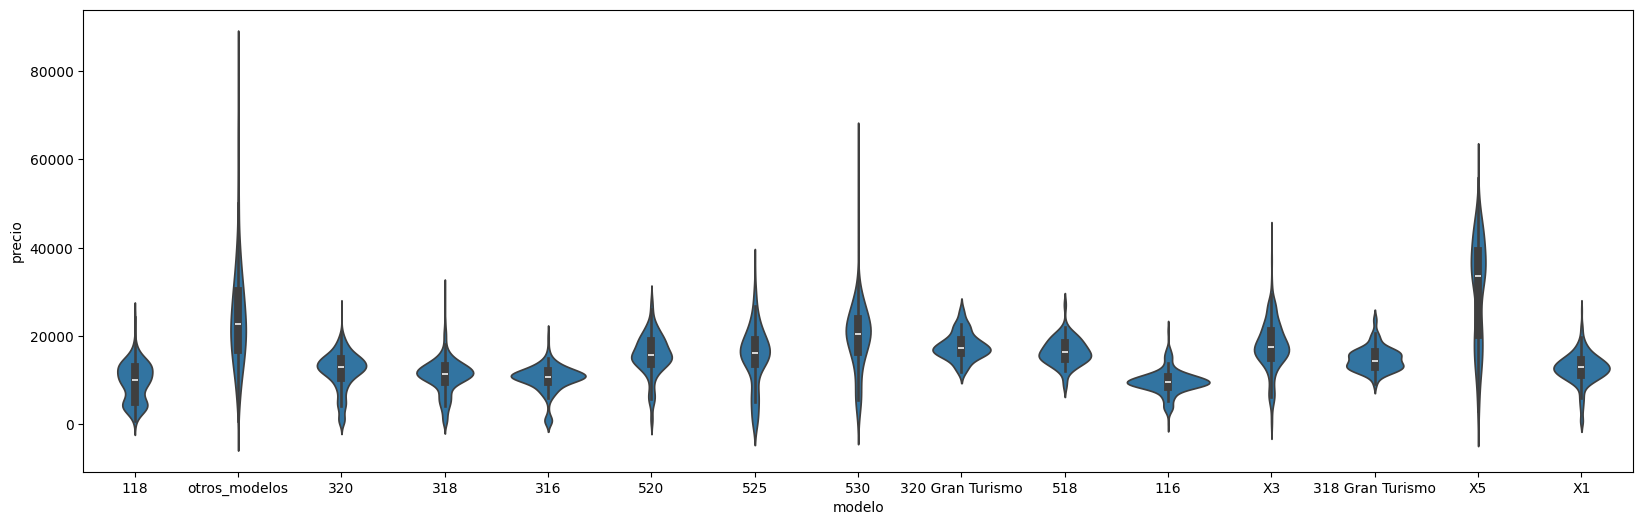

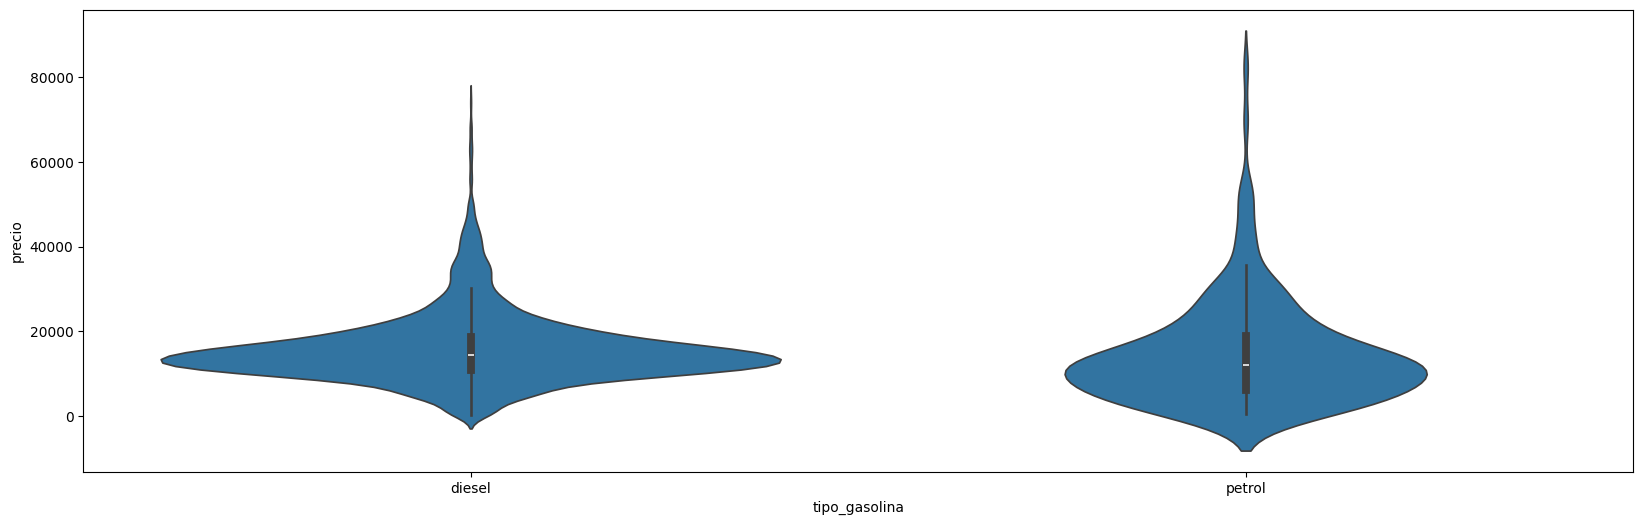

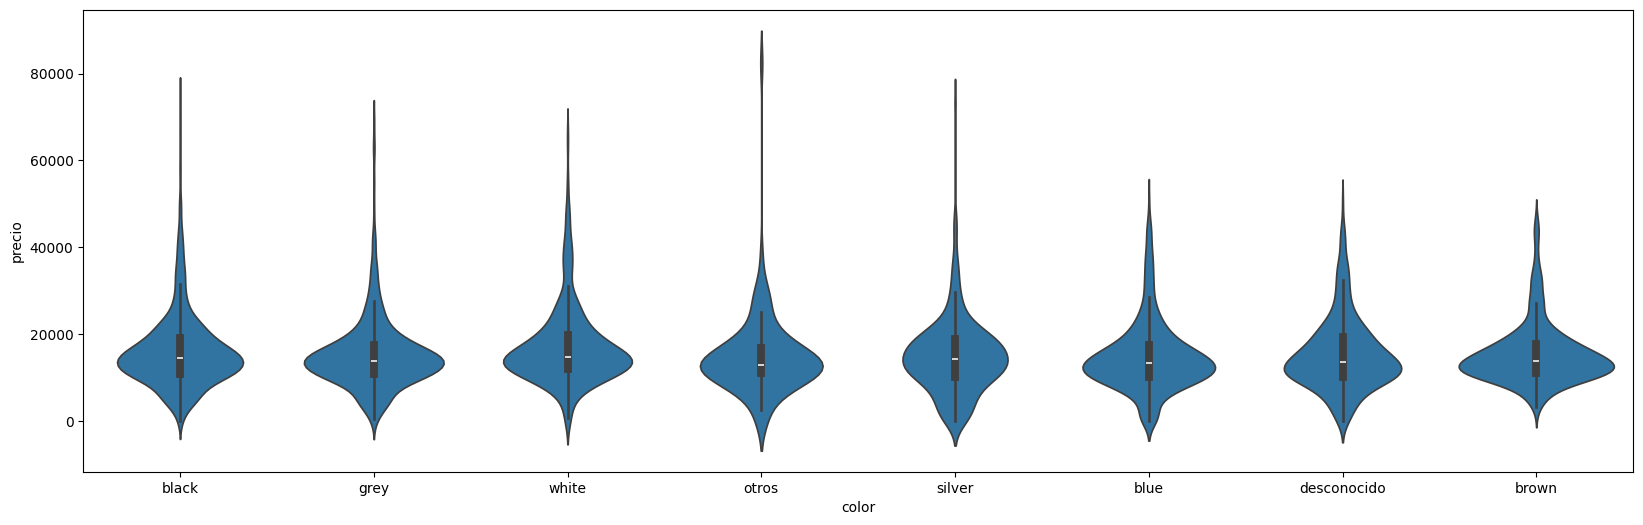

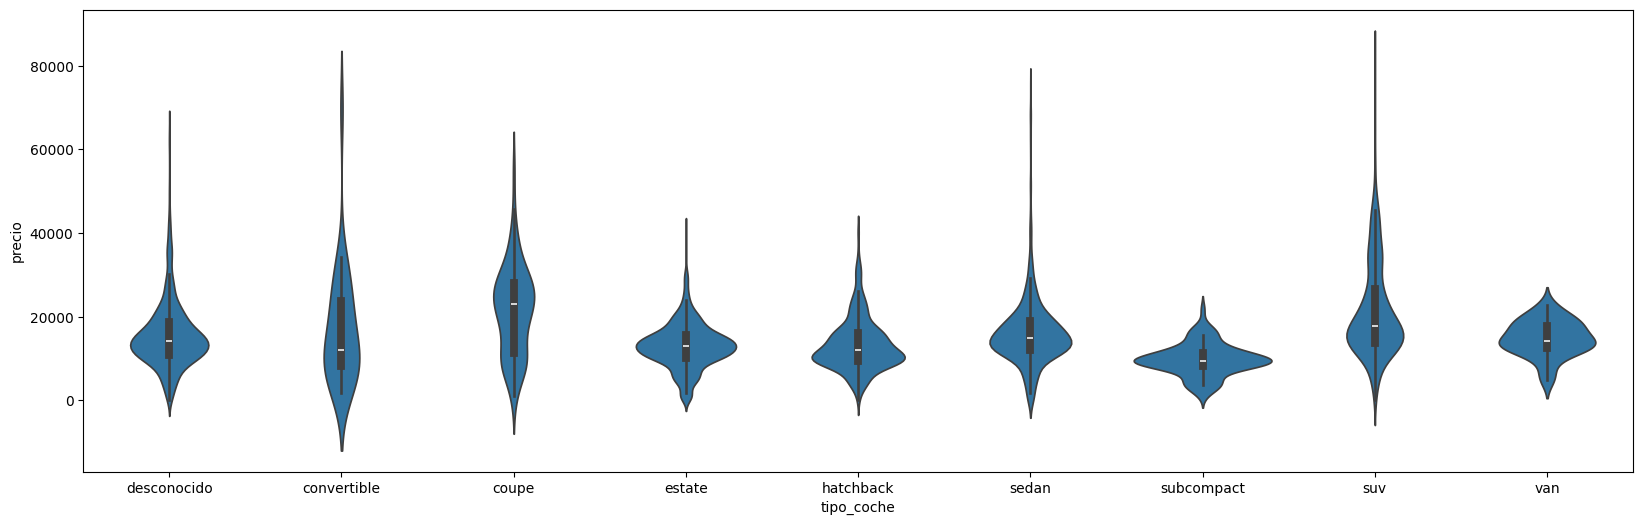

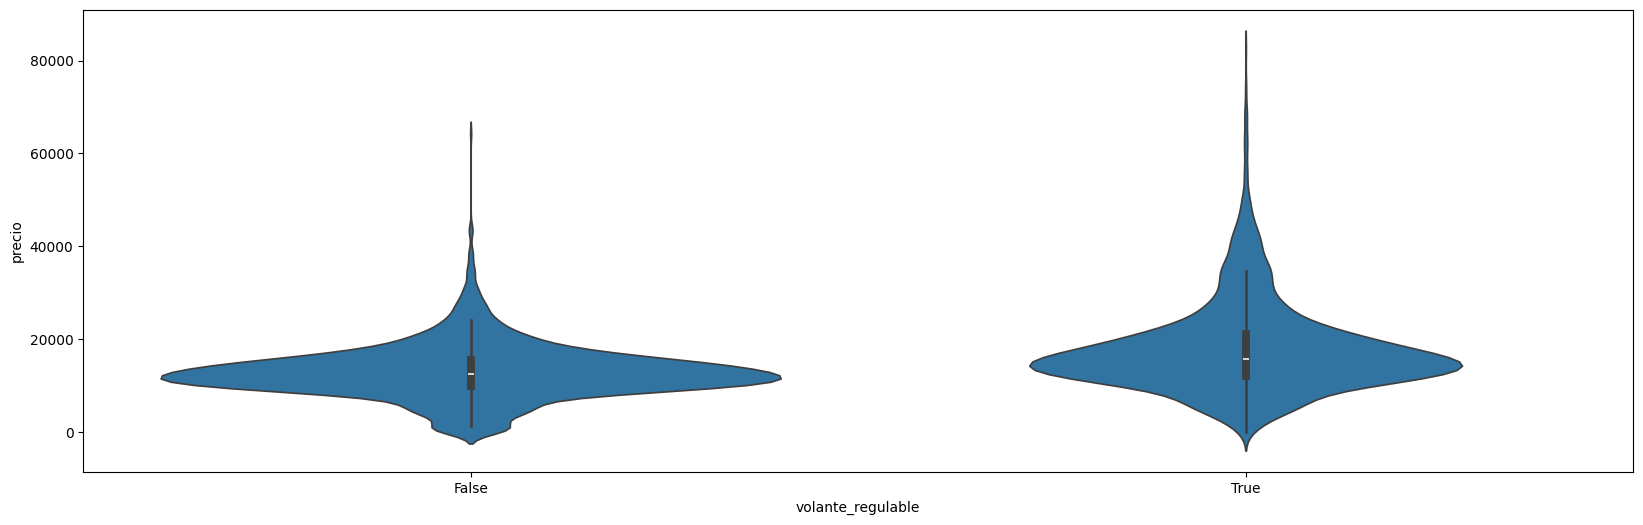

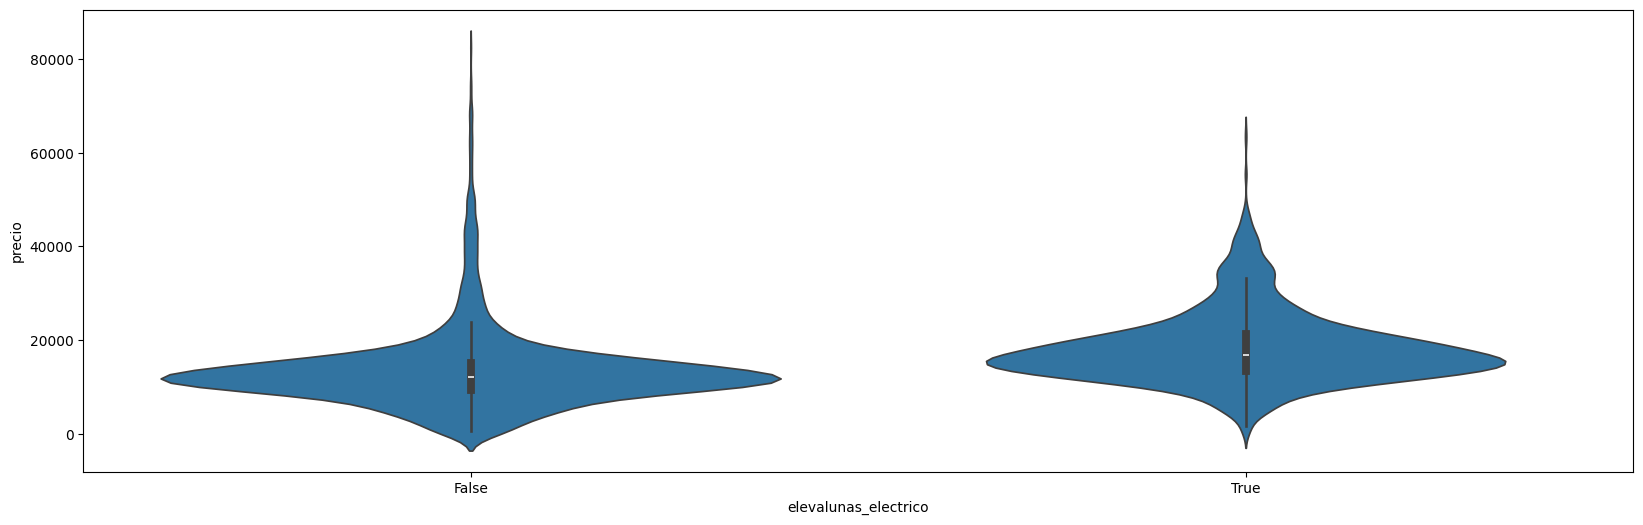

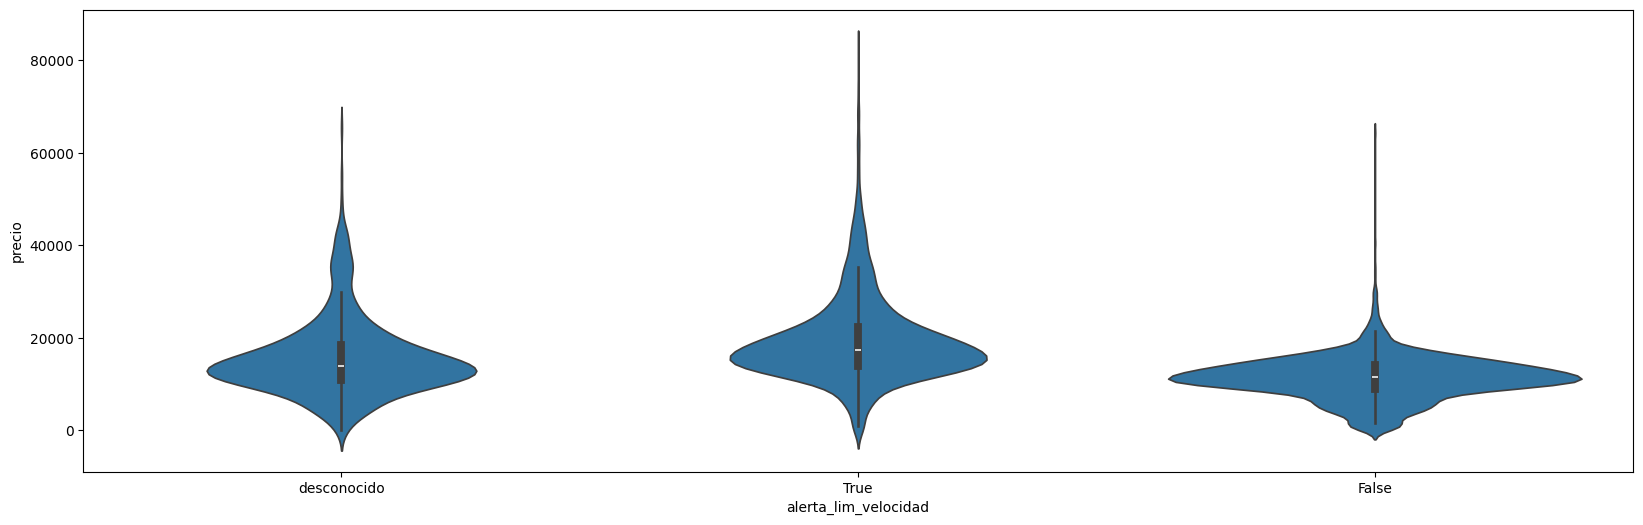

In [116]:
for i in df_imputado:
  if (df_imputado[i].dtype.kind=="O"):
    plt.figure(figsize=(20, 6))
    sns.violinplot(x=i, y="precio", data=df_imputado)

In [117]:
df_imputado.precio.describe()

count     4812.000000
mean     15739.796342
std       8633.576941
min        100.000000
25%      10800.000000
50%      14200.000000
75%      18600.000000
max      82400.000000
Name: precio, dtype: float64

#### 
- Los precios de los coches diesel están mas concentrados por debajo de 20000 y los coches más caros son de gasolina.
- Todos los colores tienen una distribución parecida, probablemente no presente buena corelación con el target.
- Los subcompact y van suelen ser más baratos y los SUV tienen precios más caros. En convertible los precios están muy dispersos a lo largo de todo el rango de precios.
- Volante: Son muy parecidos, pero los coches más caros tienen el volante regulable.
- Elevalunas eléctrico: Son muy parecidos pero los coches mas caros no tienen elevalunas eléctricos.
- Alerta lim velocidad: Parece haber una tendencia a ser más barato si no lo tiene. Los datos desconocidos presentan una distribución similar al valor True, pero con una tendencia a menor precio.
- No hay coches caros con poca potencia y conforme sube la potencia tiende a subir el precio.
- Los coches con menos km tienen precios caros, y cuantos más km, tienden a ser más baratos.
- Se ve una tendencia de subida de precio conforme sube la potencia.
- Los coches con menos antigüedad tienen precios caros, y cuanto más antigüedad, tienden a ser más baratos.
 

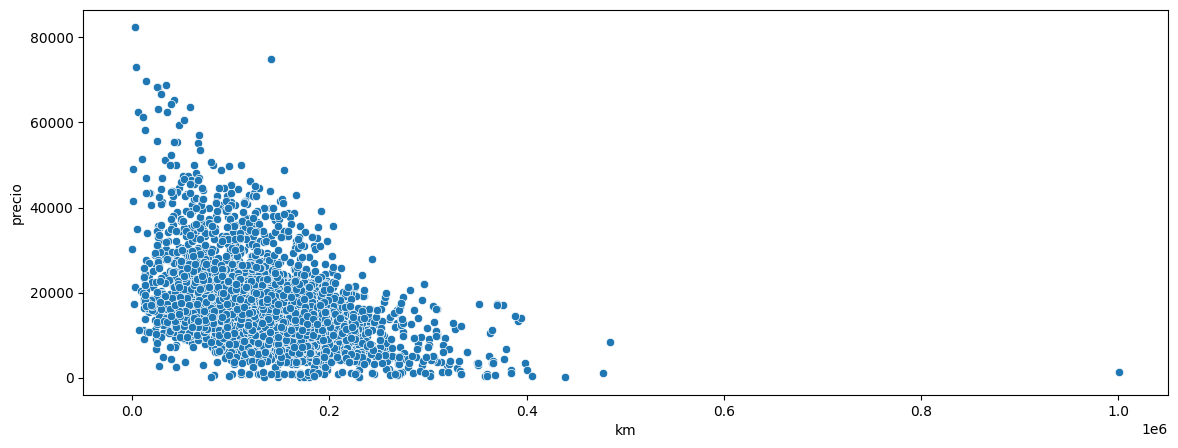

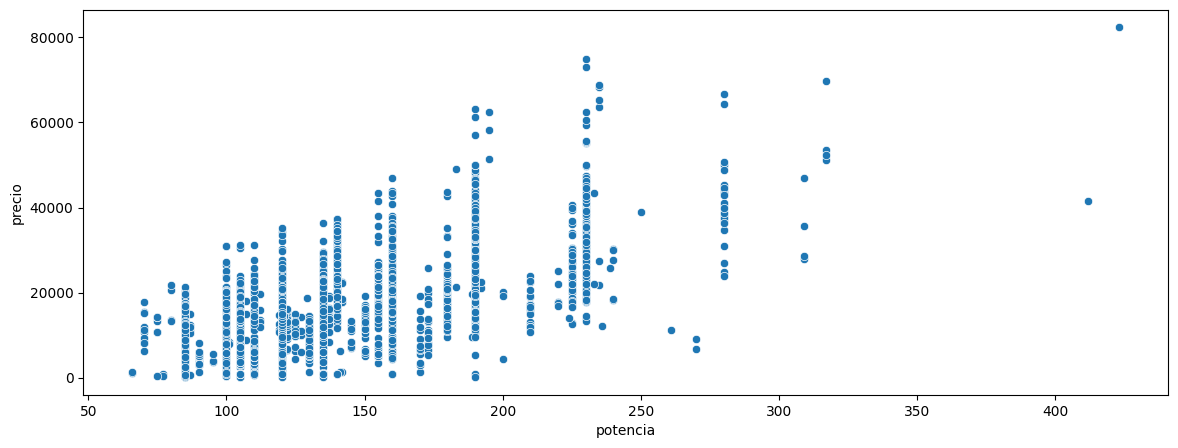

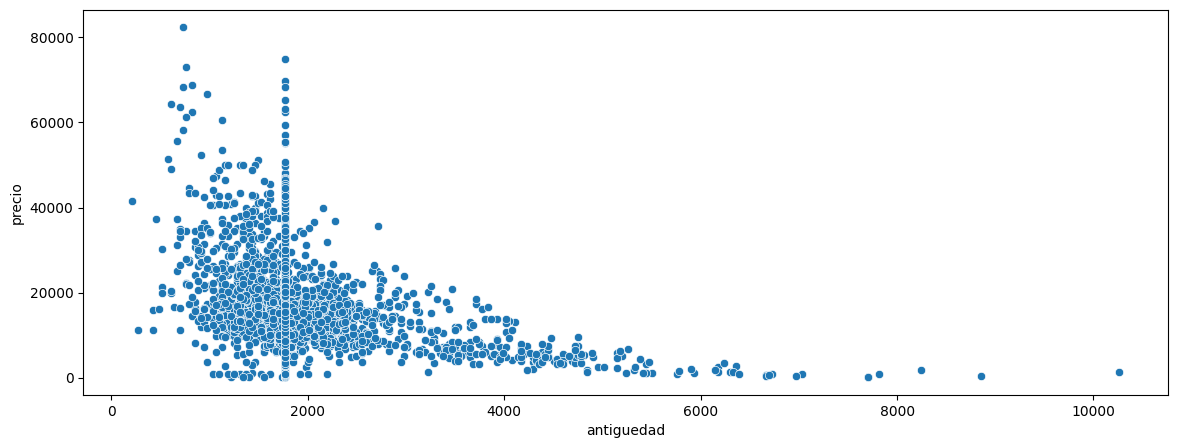

In [119]:
for i in df_imputado:
  if (df_imputado[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure(figsize=(14,5))
    sns.scatterplot(x=i, y="precio", data=df_imputado)

In [120]:
df_imputado[df_imputado['km']>1000000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad
3732,118,1000376.0,90.0,diesel,desconocido,desconocido,True,False,False,False,False,False,1400.0,4840.0


In [121]:
#Observamos correlacion inversa entre km y precio y detectamos un outlier de km. Borramos el outlier

df_imputado.drop(df_imputado[df_imputado['km']>1000000].index, inplace=True)

Observamos correlacion entre potencia y km
Observamos correlacion inversa entre antiguedad y precio
Los coches más caros únicamente tienen precios caros, y cuanto más km tiende a ser más barato
Se ve una tendencia de subida de precio conforme sube la potencia
Antiguedad idem de km

####  Transformación de categóricas a numéricas

#### 
- Volante regulable, aire acondicionado, cámara trasera, elevalunas eléctrico y bluetooth: Cambiamos True a 1 y False a 0.
- Modelo, tipo gasolina, color, tipo de coche y alerta límite de velocidad: aplicamos one hot encoding.

In [123]:
df_imputado.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,desconocido,True,True,False,True,False,desconocido,11300.0,2161.0
1,otros_modelos,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,69700.0,1767.0
2,320,183297.0,120.0,diesel,white,desconocido,False,False,False,True,False,False,10200.0,2132.0
3,otros_modelos,128035.0,135.0,diesel,otros,convertible,True,True,False,True,True,desconocido,25100.0,1767.0
4,otros_modelos,97097.0,160.0,diesel,silver,desconocido,True,True,False,False,True,True,33400.0,1767.0


In [124]:
df_imputado.reset_index(drop=True,inplace=True)

In [125]:
for col in ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth']:
    print(df_imputado[col].value_counts())

volante_regulable
True     2644
False    2167
Name: count, dtype: int64
aire_acondicionado
True     3926
False     885
Name: count, dtype: int64
camara_trasera
False    3841
True      970
Name: count, dtype: int64
elevalunas_electrico
False    2593
True     2218
Name: count, dtype: int64
bluetooth
False    3820
True      991
Name: count, dtype: int64


In [126]:
for col in ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth']:
    df_imputado[col] = np.where(df_imputado[col] == True, 1, 0)

In [127]:
df_imputado.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,desconocido,1,1,0,1,0,desconocido,11300.0,2161.0
1,otros_modelos,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,True,69700.0,1767.0
2,320,183297.0,120.0,diesel,white,desconocido,0,0,0,1,0,False,10200.0,2132.0
3,otros_modelos,128035.0,135.0,diesel,otros,convertible,1,1,0,1,1,desconocido,25100.0,1767.0
4,otros_modelos,97097.0,160.0,diesel,silver,desconocido,1,1,0,0,1,True,33400.0,1767.0


In [128]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_imputado, target)   

In [129]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'alerta_lim_velocidad']

In [130]:
df_imputado = pd.get_dummies(data=df_imputado, columns=lista_categoricas, dtype=int) 

In [131]:
df_imputado.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,precio,antiguedad,modelo_116,modelo_118,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_518,modelo_520,modelo_525,modelo_530,modelo_X1,modelo_X3,modelo_X5,modelo_otros_modelos,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_desconocido
0,140411.0,100.0,1,1,0,1,0,11300.0,2161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,13929.0,317.0,1,1,0,0,1,69700.0,1767.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,183297.0,120.0,0,0,0,1,0,10200.0,2132.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,128035.0,135.0,1,1,0,1,1,25100.0,1767.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,97097.0,160.0,1,1,0,0,1,33400.0,1767.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


####  Escalamos variables usando minmaxscaler y luego aplicamos la correlación final de variables

In [132]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   km                                4811 non-null   float64
 1   potencia                          4811 non-null   float64
 2   volante_regulable                 4811 non-null   int32  
 3   aire_acondicionado                4811 non-null   int32  
 4   camara_trasera                    4811 non-null   int32  
 5   elevalunas_electrico              4811 non-null   int32  
 6   bluetooth                         4811 non-null   int32  
 7   precio                            4811 non-null   float64
 8   antiguedad                        4811 non-null   float64
 9   modelo_116                        4811 non-null   int32  
 10  modelo_118                        4811 non-null   int32  
 11  modelo_316                        4811 non-null   int32  
 12  modelo

In [133]:
lista_numericas

['km', 'potencia', 'antiguedad']

In [134]:
MinMax = MinMaxScaler() 
df_imputado[lista_numericas] = MinMax.fit_transform(df_imputado[lista_numericas])

In [135]:
df_imputado.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,precio,antiguedad,modelo_116,modelo_118,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_518,modelo_520,modelo_525,modelo_530,modelo_X1,modelo_X3,modelo_X5,modelo_otros_modelos,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_desconocido
0,0.289039,0.095238,1,1,0,1,0,11300.0,0.193767,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0.027787,0.703081,1,1,0,0,1,69700.0,0.154535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.377621,0.151261,0,0,0,1,0,10200.0,0.190879,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.263476,0.193277,1,1,0,1,1,25100.0,0.154535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0.199573,0.263305,1,1,0,0,1,33400.0,0.154535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [136]:
corr = df_imputado.corr(numeric_only=True)

corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,precio,antiguedad,modelo_116,modelo_118,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_518,modelo_520,modelo_525,modelo_530,modelo_X1,modelo_X3,modelo_X5,modelo_otros_modelos,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_desconocido,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_desconocido,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_False,alerta_lim_velocidad_True,alerta_lim_velocidad_desconocido
km,1.000000,-0.047249,0.067243,0.021423,0.003957,0.049219,-0.031245,-0.426886,0.330853,-0.110846,-0.030218,0.003910,0.061354,0.007264,0.100085,-0.018785,0.030055,0.096050,0.099976,0.072300,-0.060225,-0.034807,-0.036012,-0.172277,0.037592,-0.037592,0.033964,-0.018960,-0.021276,0.001047,0.028615,-0.014927,0.026380,-0.067865,-0.034264,-0.048240,-0.003418,0.138112,-0.097407,0.064271,-0.030902,-0.091952,-0.071348,0.033930,-0.025294,-0.010971
potencia,-0.047249,1.000000,0.326847,0.182728,0.316319,0.341150,0.203489,0.680893,-0.066166,-0.319941,-0.114990,-0.256742,-0.261454,-0.099836,-0.032336,0.014054,-0.079210,-0.014570,0.111832,0.271687,-0.118264,0.045609,0.345704,0.454006,-0.121230,0.121230,0.035068,-0.012597,-0.056785,-0.006798,0.003989,-0.021652,0.013444,0.006946,0.021261,0.106524,-0.010336,-0.043289,-0.177888,0.027961,-0.134891,0.196425,-0.038220,-0.427137,0.426284,-0.012370
volante_regulable,0.067243,0.326847,1.000000,0.288301,0.255023,0.279123,0.125379,0.285656,0.043507,-0.193806,-0.121050,-0.132432,-0.096688,-0.045502,-0.094051,-0.014077,0.063672,0.175209,0.092663,0.100441,-0.098395,0.056459,0.143526,0.140295,0.010631,-0.010631,0.025520,0.012499,0.038949,-0.025907,0.050720,-0.032047,-0.014703,-0.102818,0.045178,0.025568,-0.022491,0.002356,-0.117311,0.058162,-0.090939,0.081561,-0.026650,-0.189463,0.187114,-0.002738
aire_acondicionado,0.021423,0.182728,0.288301,1.000000,0.144994,0.258305,0.102539,0.245354,-0.136672,-0.153610,-0.101049,-0.037833,0.009888,0.029938,-0.045309,0.001881,0.042159,0.133816,0.046734,0.069087,-0.110181,-0.008611,0.075906,0.044386,0.087551,-0.087551,0.042624,0.001732,0.047339,-0.045862,0.022453,-0.032716,-0.035284,-0.048841,-0.037356,-0.038686,-0.023405,0.080067,-0.069105,0.058270,-0.106170,-0.010404,0.009250,-0.172795,0.183929,-0.021021
camara_trasera,0.003957,0.316319,0.255023,0.144994,1.000000,0.200383,0.127069,0.264821,0.017818,-0.103007,-0.035601,-0.084412,-0.099636,-0.024170,-0.068108,0.009670,0.003087,0.003950,0.057155,0.076819,-0.027372,0.019635,0.145577,0.160097,-0.014568,0.014568,0.021283,-0.000672,-0.016446,-0.032494,0.016087,-0.028387,0.001153,0.003138,-0.033226,0.031931,0.005035,-0.037215,-0.032326,-0.012854,-0.043449,0.091095,-0.012362,-0.166969,0.167090,-0.005469
elevalunas_electrico,0.049219,0.341150,0.279123,0.258305,0.200383,1.000000,0.232115,0.281885,-0.066550,-0.171672,-0.094770,-0.150379,-0.152161,-0.037735,-0.003900,0.035288,0.098841,0.121751,0.088573,0.128184,-0.101337,0.018183,0.100712,0.147161,-0.006287,0.006287,0.078481,-0.034309,-0.021986,-0.011222,-0.016700,-0.037122,-0.032759,0.013589,0.000896,0.085193,-0.006043,0.044601,-0.070077,0.011043,-0.098017,0.020955,-0.061249,-0.299389,0.292010,0.000791
bluetooth,-0.031245,0.203489,0.125379,0.102539,0.127069,0.232115,1.000000,0.201683,-0.049123,-0.050415,0.020498,-0.071812,-0.043714,0.025667,0.000182,0.050298,-0.037978,-0.047445,0.011566,0.042407,-0.076379,0.032164,0.016485,0.134714,-0.030683,0.030683,0.021675,0.007190,-0.046693,-0.017875,-0.031919,0.012643,-0.016706,0.064559,0.038001,0.098076,-0.015532,-0.017119,0.027478,-0.010810,-0.044481,0.006390,-0.019744,-0.076126,0.088752,-0.020032
precio,-0.426886,0.680893,0.285656,0.245354,0.264821,0.281885,0.201683,1.000000,-0.324143,-0.200026,-0.121982,-0.140312,-0.200799,-0.014761,-0.176923

In [137]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   km                                4811 non-null   float64
 1   potencia                          4811 non-null   float64
 2   volante_regulable                 4811 non-null   int32  
 3   aire_acondicionado                4811 non-null   int32  
 4   camara_trasera                    4811 non-null   int32  
 5   elevalunas_electrico              4811 non-null   int32  
 6   bluetooth                         4811 non-null   int32  
 7   precio                            4811 non-null   float64
 8   antiguedad                        4811 non-null   float64
 9   modelo_116                        4811 non-null   int32  
 10  modelo_118                        4811 non-null   int32  
 11  modelo_316                        4811 non-null   int32  
 12  modelo

### Aplicamos modelo de predicción Regresión Lineal

In [140]:
X = df_imputado.drop(['precio'],axis=1).astype(float) # VARIABLES INDEPENDIENTES
y = df_imputado['precio'] # VARIABLE DEPENDIENTE (A PREDECIR)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23) # Separamos los datasets de train y test

In [142]:
lin_reg = LinearRegression() # Modelo de regresión lineal

In [143]:
lin_reg.fit(X_train,y_train) # Entrenamos el modelo con los datasets de train

LinearRegression()

In [144]:
y_pred = lin_reg.predict(X_test) # Predecimos con el modelo usando los datasets de test

In [145]:
df_resultado = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}) # Creamos un dataset con el precio predicho y el precio real del dataset de test

In [146]:
df_resultado.describe()

,Actual,Predicted
count,963.000000,963.000000
mean,15502.284528,15553.915804
std,8432.550965,7340.557991
min,100.000000,-13628.653451
25%,10700.000000,10912.443838
50%,14000.000000,14280.218240
75%,18350.000000,19144.339071
max,68300.000000,47682.221335


In [147]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 19714909.229762007
R-squared: 0.7224584255670963


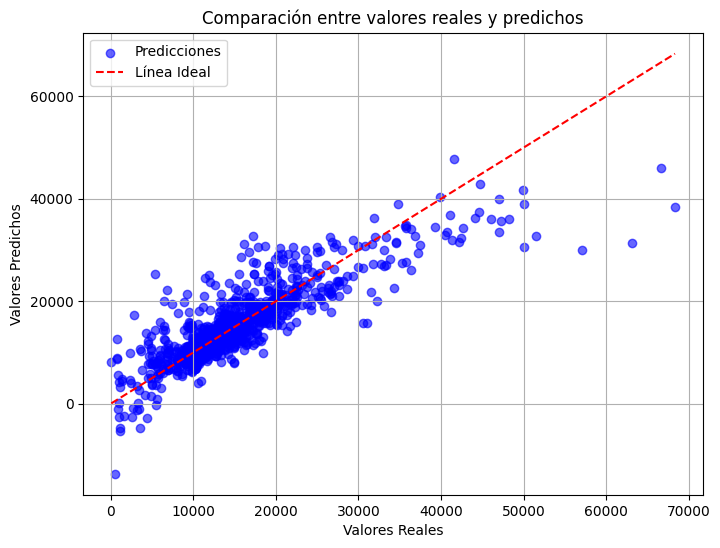

In [148]:
# Gráfico de dispersión con puntos
plt.figure(figsize=(8, 6))
plt.scatter(df_resultado['Actual'], df_resultado['Predicted'], alpha=0.6, color='b', marker='o', label="Predicciones")  
plt.plot([df_resultado['Actual'].min(), df_resultado['Actual'].max()],
         [df_resultado['Actual'].min(), df_resultado['Actual'].max()], 'r--', label="Línea Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre valores reales y predichos")
plt.legend()
plt.grid(True)
plt.show()